In [70]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

# UV irradiance moon

1.625024876529603e-08


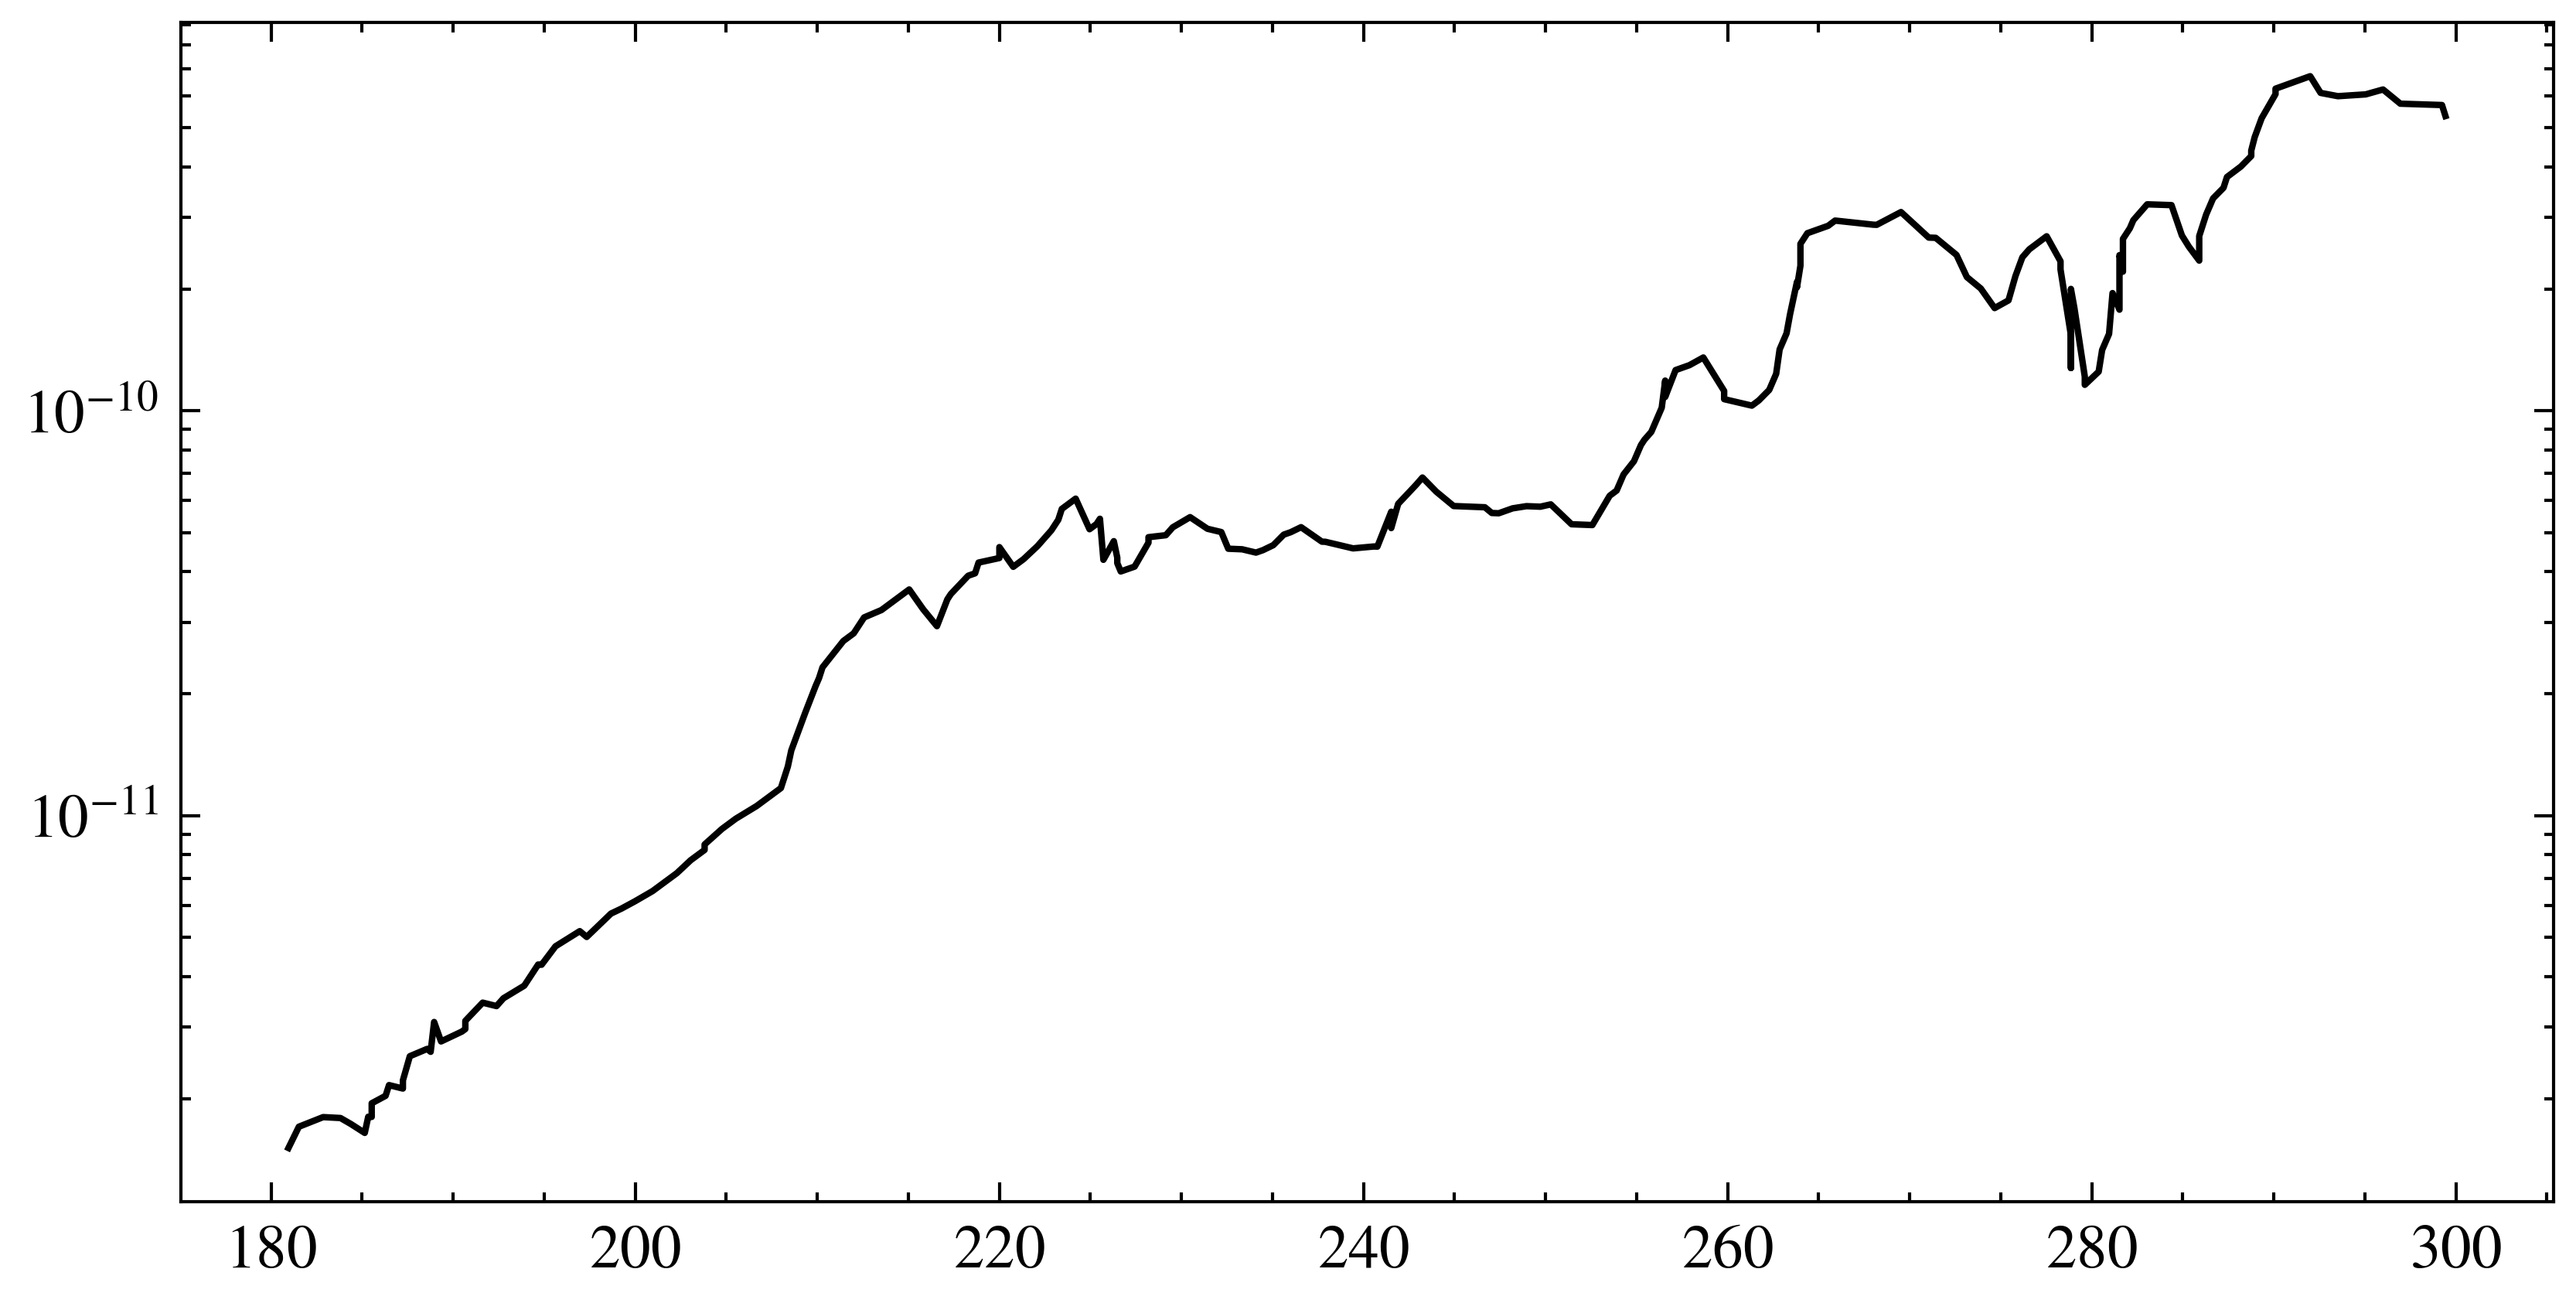

In [71]:
nm, photons = np.loadtxt("moon.csv", delimiter=',', unpack=True)
sort = np.argsort(nm)

h = 6.626e-34                               # Js
c = 3e8                                     # m/s
irradiance = photons * h * c / (nm * 1e-9)
irradiance *= 1e5                           # to convert from cm2 to m2

irradiance = irradiance[sort]
nm = nm[sort]

plt.plot(nm, irradiance)
plt.yscale('log')

int_irradiance = 0

for dx, y in zip(np.diff(nm), irradiance):
    int_irradiance += y * dx

print(int_irradiance)

# UV irradiance extensive air shower

In [109]:
# calculate irradiance in W/m2
def calc_irradiance(distance):
    return np.max(irradiance) / (4 * np.pi * (distance)**2) * np.exp(-0.14 * distance/1e3)
#                                    ^ area                      ^ attenuation

def calc_density(h):

    pb = 0.8638
    hb = 1400
    Lb = 5
    Tb = 278
    M = 0.0289644
    g = 9.80665
    R = 8.314459
    
    # troposphere = lambda x: pb * (1 - (x-hb) * Lb/Tb) ** ((g*M)/(R*Lb)-1)         # something went wrong here
    stratosphere = lambda x: pb * np.exp(-g*M*(x-hb)/(R*Tb))

    return stratosphere(h)

def calc_height(depth, theta=0):

    x, h = 0, 100000
    stepwidth = np.cos(360/(2*np.pi) * theta)

    while x < depth:
        x += calc_density(h) * stepwidth
        h -= stepwidth

    return h - 1500

E0 = 1e18                                                       # energy of primary particle (eV)
e_gamma = 0.5 * E0 * (1 - 1/np.log(E0/(20e9)/np.log(15)))
e_fluorescence = 5 * (e_gamma/0.85e6) * 5.894e-19               # fluorescence energy in J
t_life = 42e-9                                                  # radiation time for transition state
t = np.linspace(1e-12, 0.2e-5, int(1e4))
irradiance = e_fluorescence * np.exp(-t_life/t) / t             # total irradiance in W
xmax = 600
r0 = calc_height(xmax, 0)
print(xmax, r0, calc_irradiance(r0))

600 19924.0 1.7589592865602891e-10
